# K-means implementation
Dependencies:
- numpy
- matplotlib
- sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def perform_kmeans_clustering(data, k):
    """
    Perform K-means clustering on 2D or 3D data. If the data has more than three dimensions,
    it must be reduced to 2 or 3 dimensions using a dimensionality reduction algorithm (e.g., PCA)
    before applying this function.

    Parameters:
        data (np.array): The input data for clustering. It should be a numpy array with 2 or 3 dimensions.
        k (int): The number of clusters to form.

    Returns:
        labels (np.array): Array of labels indicating the cluster each data point belongs to.
        centroids (np.array): Array of centroids for the clusters.
    """
    if data.shape[1] > 3:
        raise ValueError("Data has more than 3 dimensions. Please reduce it before clustering.")
    
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Fit model on the data
    kmeans.fit(data)

    # Get the cluster labels and centroids
    return kmeans.labels_, kmeans.cluster_centers_

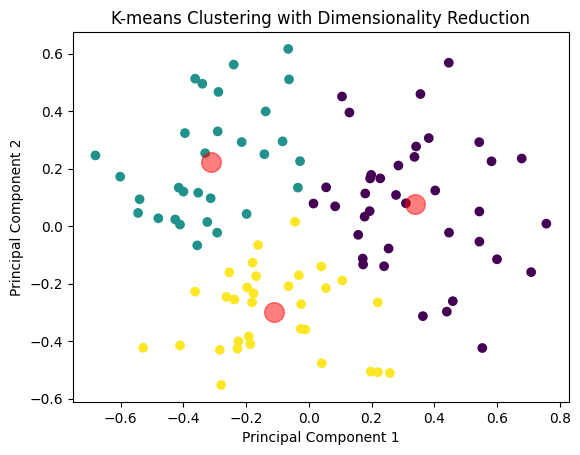

In [2]:
# Example usage:
np.random.seed(0)
sample_data = np.random.rand(100, 4)  # 100 points in 4 dimensions

# Reduce data to 2D using PCA for visualization and fitting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sample_data)

# Perform clustering with kmeans
labels, centroids = perform_kmeans_clustering(reduced_data, k=3)

# Plotting the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)  # centroids in red
plt.title('K-means Clustering with Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# k-medians implementation
Dependencies:
- numpy
- pyclustering
- sklearn

In [3]:
import numpy as np
from pyclustering.cluster.kmedians import kmedians
from pyclustering.utils import metric
from sklearn.decomposition import PCA

def perform_kmedians_clustering(data, k):
    """
    Perform K-medians clustering on 2D or 3D data. If the data has more than three dimensions,
    it must be reduced to 2 or 3 dimensions using a dimensionality reduction algorithm (e.g., PCA)
    before applying this function.

    Parameters:
        data (np.array): The input data for clustering. It should be a numpy array with 2 or 3 dimensions.
        k (int): The number of clusters to form.

    Returns:
        labels (np.array): Array of labels indicating the cluster each data point belongs to.
        medians (np.array): Array of medians for the clusters.
    """
    if data.shape[1] > 3:
        raise ValueError("Data has more than 3 dimensions. Please reduce it before clustering.")

    # Initial medians
    initial_medians = data[np.random.choice(data.shape[0], k, replace=False)]

    # Create K-medians instance
    kmedians_instance = kmedians(data, initial_medians)

    # Run cluster analysis and obtain results
    kmedians_instance.process()
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()

    # Prepare labels array to match input data order
    labels = np.empty(shape=(data.shape[0],), dtype=int)
    for cluster_index, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_index

    return labels, np.array(medians)

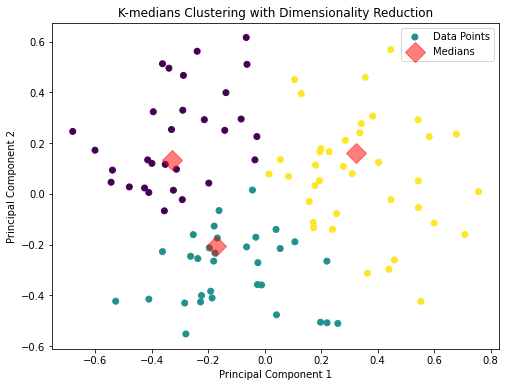

In [4]:
# Example usage:
np.random.seed(0)
sample_data = np.random.rand(100, 4)  # 100 points in 4 dimensions

# Reduce data to 2D using PCA for fitting and visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sample_data)

# Perform clustering with kmedians
labels, medians = perform_kmedians_clustering(reduced_data, k=3)
print(labels)
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(medians[:, 0], medians[:, 1], c='red', s=200, alpha=0.5, marker='D', label='Medians')
plt.title('K-medians Clustering with Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()